# Introduction

In this notebook I showcase the [Anderson Darling Test](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test). I generate three seemingly random number sequences. The first is actually a sequence of uniformly distributed random numbers. The other two are impostors. The first impostor is generated using a chaotic [logistic map](https://en.wikipedia.org/wiki/Logistic_map). The second impostor is a shuffled equally spaced sequence. To the untrained eye they will all look equally random, but the Anderson Darling test can tell them apart.

# Data Generation

We consider three seemingly random sequences. The first is a uniformly sampled random variable. The second is a logistic map. The third is a shuffled uniformly spaced sequence.

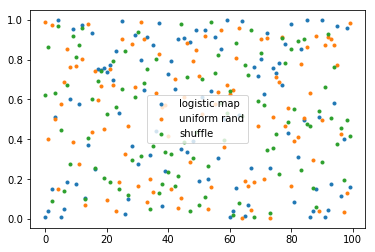

In [1]:
import numpy
import pylab

%matplotlib inline
x_unif = numpy.random.rand(100)
x_lgst = numpy.zeros_like(x_unif)
x_lgst[0] = 0.01
for i in range(1,len(x_lgst)):
    x_lgst[i] = 3.99*x_lgst[i-1]*(1-x_lgst[i-1])
x_shfl = numpy.linspace(0,1,len(x_unif)+2)[1:-1]
numpy.random.shuffle(x_shfl)
pylab.plot(x_lgst, '.', label='logistic map')
pylab.plot(x_unif, '.', label='uniform rand')
pylab.plot(x_shfl, '.', label='shuffle')
pylab.legend(loc='best')

# Poincare map

A poincare map can expose the logistic map, but not the shuffled version

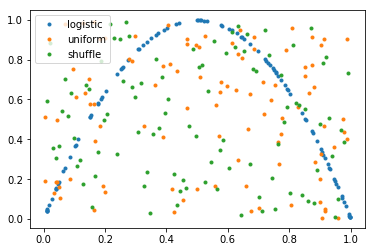

In [2]:
%matplotlib inline

pylab.plot(x_lgst[:-1], x_lgst[1:], '.', label='logistic')
pylab.plot(x_unif[:-1], x_unif[1:], '.', label='uniform')
pylab.plot(x_shfl[:-1], x_shfl[1:], '.', label='shuffle')
pylab.legend(loc='best')

# Cumulative Distribution function

The cumulative distribution reveals a difference between the different sequences

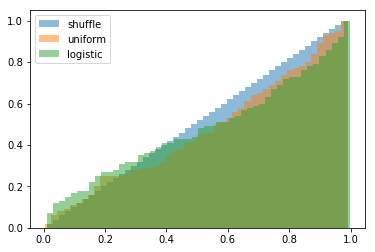

In [3]:
%matplotlib inline

pylab.hist(x_shfl, 50, cumulative=True, alpha=0.5, label='shuffle', normed=1)
pylab.hist(x_unif, 50, cumulative=True, alpha=0.5, label='uniform', normed=1)
pylab.hist(x_lgst, 50, cumulative=True, alpha=0.5, label='logistic', normed=1)
pylab.legend(loc='best')

# Anderson Darling Test

In [4]:
def ad_test(cdf, x_seq):
    N = len(x_seq)
    F = sorted(numpy.array([cdf(x) for x in x_seq]))
    res = 0
    res += -F[0]-numpy.log(1-F[0])
    res += -1 +F[-1]-numpy.log(F[-1])
    for n in range(N-1):
        res -= F[n+1] - F[n]
        res += (float(n+1)/float(N))**2*numpy.log(F[n+1]/F[n])
        res -= (1-float(n+1)/float(N))**2*numpy.log((1-F[n+1])/(1-F[n]))
    return res*N

In [5]:
ad_test(lambda x:x, x_lgst)

4.308668189629306

In [6]:
ad_test(lambda x:x, x_unif)

1.5405459412042566

In [7]:
ad_test(lambda x:x, x_shfl)

0.029212557845227704

Here we get an interesting result. The value the logistic map got is too high, meaning it's doesn't agree with a uniform distribution, as we should expect. The uniform distribution got a value close to 1, since it's exactly what we fit for. The shuffled sequence got a value much smaller than one. It fits the model too well, revealing that it is, in fact, not random.